In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


In [6]:
Predict_utilization = pd.read_csv('input_hourly.csv')
Predict_utilization = Predict_utilization.dropna()
Predict_utilization.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26280 entries, 0 to 26303
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          26280 non-null  object 
 1   month                         26280 non-null  int64  
 2   hour                          26280 non-null  int64  
 3   dayOfTheWeek                  26280 non-null  int64  
 4   site1_utilization             26280 non-null  int64  
 5   site2_utilization             26280 non-null  int64  
 6   site1_utilization_percentage  26280 non-null  float64
 7   site2_utilization_percentage  26280 non-null  float64
 8   temperature                   26280 non-null  float64
 9   precipitation                 26280 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.2+ MB


Mean Squared Error: 1069603604.4748528


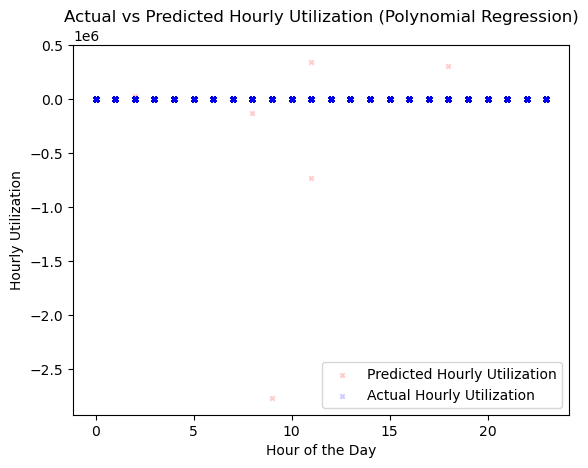

In [7]:
# Assuming 'Predict_utilization' is your DataFrame
# X will contain the features (hour, day_of_week, month, year)
X = Predict_utilization[['hour', 'dayOfTheWeek', 'month', 'temperature', 'precipitation']]
y = Predict_utilization['site1_utilization_percentage']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a polynomial regression model
degree = 10 # You can adjust the degree of the polynomial
model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual and predicted hourly utilization over the hour
plt.scatter(X_test['hour'], y_pred, c='red', marker='x',label='Predicted Hourly Utilization', alpha=0.2, s=10)
plt.scatter(X_test['hour'], y_test, c='blue', marker='x', label='Actual Hourly Utilization', alpha=0.2, s=10)
plt.xlabel("Hour of the Day")
plt.ylabel("Hourly Utilization")
plt.title("Actual vs Predicted Hourly Utilization (Polynomial Regression)")
plt.legend()
plt.show()

### Discuss
Does it make sense to include khWdelivered? 
It is very easy to derive the utilization by khW delivered and in a prediction szenario we dont have this data